<h4>About  the Project:</h4>
<br>
<p style="text-indent:5em"> Hybrid energy system is entitled  for producig energy power from different energy sources like wind, sun,  battery .Telecom towers are essential infrastructure for enabling seamless communication services and data 
connectivity in rural areas. However, these towers often face significant challenges due to unreliable 
and insufficient power supply from traditional electrical grids. To address this issue, this report 
proposes the design and implementation of a Hybrid Off-Grid Energy System capable of providing a 
continuous and efficient power output ranging from 25 kW to 250 kW, catering to the varying power 
demands of telecom towers in rural regions in texas. </p>

<p style="text-indent:sem">The design requires consideration of all possible energy sources and energy conversion 
alternatives in the development of a hybrid system.</p>



<h3>Aim Of Project:</h3>
<p style="text-indent:5em">
To build a model which  will give better  Accuracy in power supply of different energy source  paarmeters 

In [954]:
import  pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
import  seaborn as sns



In [955]:
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")

In [956]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree     import  DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.neural_network import  MLPClassifier
from  sklearn.svm import  SVC


#### Data Acquisition

In [957]:
df=pd.read_csv('hybrid_energy_system_data (2).csv')

In [958]:
df.head()

,Timestamp,Solar PV (kW),Wind (kW),Generator (kW),Telecom Tower Load (kW),Supply Consumption (kW),Batteries State of Charge (%),Diesel Level (Liters),Temperature (°C),Humidity (%),Solar Radiation (W/m²),Wind Speed (m/s),Maintenance Required
0,2022-01-01 00:00:00,9.78,5.50,0,8.93,6.35,83,100,20.0,78,770,4.7,No
1,2022-01-02 00:00:00,12.34,4.86,0,7.46,9.74,80,100,21.7,60,767,4.7,No
2,2022-01-03 00:00:00,10.19,4.07,0,9.38,4.88,71,100,20.7,74,858,3.7,Yes
3,2022-01-04 00:00:00,9.60,6.67,0,8.60,7.67,86,100,24.0,67,604,4.3,No
4,2022-01-05 00:00:00,13.03,6.58,0,7.69,11.92,83,100,24.9,63,693,5.3,Yes


###  For Converting the object type into int type

In [959]:
from sklearn.preprocessing import  LabelEncoder
df["Maintenance Required"]=LabelEncoder().fit_transform(df["Maintenance Required"])

In [960]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [961]:
df.head()

,Solar PV (kW),Wind (kW),Generator (kW),Telecom Tower Load (kW),Supply Consumption (kW),Batteries State of Charge (%),Diesel Level (Liters),Temperature (°C),Humidity (%),Solar Radiation (W/m²),Wind Speed (m/s),Maintenance Required
0,9.78,5.50,0,8.93,6.35,83,100,20.0,78,770,4.7,0
1,12.34,4.86,0,7.46,9.74,80,100,21.7,60,767,4.7,0
2,10.19,4.07,0,9.38,4.88,71,100,20.7,74,858,3.7,1
3,9.60,6.67,0,8.60,7.67,86,100,24.0,67,604,4.3,0
4,13.03,6.58,0,7.69,11.92,83,100,24.9,63,693,5.3,1


### EDA performance on Dataset

In [962]:
print(" df Shape : ",df.shape)

 df Shape :  (365, 12)


In [963]:
df['Supply Consumption (kW)'].value_counts()

8.35     2
10.22    2
5.61     2
7.52     2
6.08     2
        ..
5.46     1
8.99     1
7.08     1
7.21     1
8.91     1
Name: Supply Consumption (kW), Length: 332, dtype: int64

In [964]:
Y=df.iloc[:,-1]
Y.head()


0    0
1    0
2    1
3    0
4    1
Name: Maintenance Required, dtype: int32

In [965]:
df.tail()

,Solar PV (kW),Wind (kW),Generator (kW),Telecom Tower Load (kW),Supply Consumption (kW),Batteries State of Charge (%),Diesel Level (Liters),Temperature (°C),Humidity (%),Solar Radiation (W/m²),Wind Speed (m/s),Maintenance Required
360,9.31,5.34,0,8.71,5.94,89,100,23.7,69,751,4.7,0
361,8.34,4.86,0,9.91,3.29,75,100,24.5,62,703,3.3,1
362,8.99,3.30,0,7.55,4.74,71,100,21.5,78,872,3.3,1
363,12.38,6.77,0,7.40,11.75,70,100,22.9,73,864,3.1,0
364,13.00,5.32,0,9.41,8.91,90,100,22.6,62,600,3.5,1


In [966]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Solar PV (kW)                  365 non-null    float64
 1   Wind (kW)                      365 non-null    float64
 2   Generator (kW)                 365 non-null    int64  
 3   Telecom Tower Load (kW)        365 non-null    float64
 4   Supply Consumption (kW)        365 non-null    float64
 5   Batteries State of Charge (%)  365 non-null    int64  
 6   Diesel Level (Liters)          365 non-null    int64  
 7   Temperature (°C)               365 non-null    float64
 8   Humidity (%)                   365 non-null    int64  
 9   Solar Radiation (W/m²)         365 non-null    int64  
 10  Wind Speed (m/s)               365 non-null    float64
 11  Maintenance Required           365 non-null    int32  
dtypes: float64(6), int32(1), int64(5)
memory usage: 32

In [967]:
X=df.iloc[:,:]
X.head()

,Solar PV (kW),Wind (kW),Generator (kW),Telecom Tower Load (kW),Supply Consumption (kW),Batteries State of Charge (%),Diesel Level (Liters),Temperature (°C),Humidity (%),Solar Radiation (W/m²),Wind Speed (m/s),Maintenance Required
0,9.78,5.50,0,8.93,6.35,83,100,20.0,78,770,4.7,0
1,12.34,4.86,0,7.46,9.74,80,100,21.7,60,767,4.7,0
2,10.19,4.07,0,9.38,4.88,71,100,20.7,74,858,3.7,1
3,9.60,6.67,0,8.60,7.67,86,100,24.0,67,604,4.3,0
4,13.03,6.58,0,7.69,11.92,83,100,24.9,63,693,5.3,1


In [968]:
df.describe()

,Solar PV (kW),Wind (kW),Generator (kW),Telecom Tower Load (kW),Supply Consumption (kW),Batteries State of Charge (%),Diesel Level (Liters),Temperature (°C),Humidity (%),Solar Radiation (W/m²),Wind Speed (m/s),Maintenance Required
count,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000
mean,11.059233,5.023753,0.0,8.528712,7.554274,74.679452,100.0,21.621096,69.912329,759.972603,4.281096,0.506849
std,1.695061,1.186446,0.0,0.835001,2.215553,8.977918,0.0,2.044241,6.217927,86.313792,0.728765,0.500639
min,8.000000,3.000000,0.0,7.010000,1.450000,60.000000,100.0,18.000000,60.000000,600.000000,3.000000,0.000000
25%,9.740000,3.940000,0.0,7.800000,6.030000,67.000000,100.0,19.800000,64.000000,691.000000,3.700000,0.000000
50%,11.180000,5.060000,0.0,8.590000,7.560000,75.000000,100.0,21.700000,70.000000,758.000000,4.300000,1.000000
75%,12.400000,6.040000,0.0,9.180000,9.050000,82.000000,100.0,23.500000,76.000000,838.000000,4.900000,1.000000
max,13.980000,6.990000,0.0,9.990000,12.620000,90.000000,100.0,25.000000,80.000000,900.000000,5.500000,1.000000


In [969]:
df['Solar Radiation (W/m²)'].unique()

array([770, 767, 858, 604, 693, 703, 692, 768, 854, 774, 743, 798, 602,
       757, 895, 689, 633, 891, 658, 717, 873, 732, 694, 735, 802, 809,
       713, 890, 759, 861, 623, 626, 793, 806, 856, 638, 659, 644, 801,
       784, 742, 695, 741, 734, 746, 728, 843, 675, 651, 685, 838, 744,
       613, 721, 779, 619, 837, 672, 624, 729, 724, 781, 835, 797, 766,
       687, 686, 796, 783, 791, 664, 887, 804, 607, 640, 696, 862, 702,
       763, 754, 704, 800, 755, 864, 698, 733, 834, 654, 884, 621, 788,
       900, 814, 739, 811, 898, 899, 775, 896, 888, 805, 684, 639, 790,
       782, 825, 831, 753, 826, 611, 726, 773, 889, 690, 634, 750, 851,
       657, 738, 660, 875, 697, 751, 708, 666, 615, 860, 880, 847, 673,
       849, 643, 874, 840, 866, 617, 792, 631, 886, 616, 893, 777, 855,
       718, 747, 618, 720, 846, 630, 819, 678, 863, 627, 848, 683, 816,
       885, 821, 652, 663, 845, 841, 829, 601, 780, 857, 787, 719, 723,
       769, 876, 667, 822, 833, 844, 727, 647, 882, 603, 752, 84

### Data Visualization

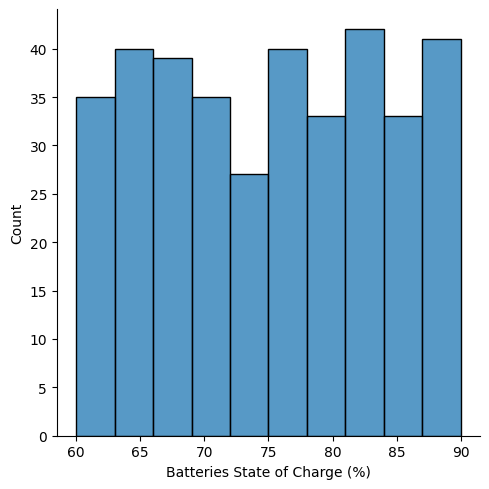

In [970]:
sns.displot(df,x="Batteries State of Charge (%)", legend=True)

<AxesSubplot: ylabel='Batteries State of Charge (%)'>

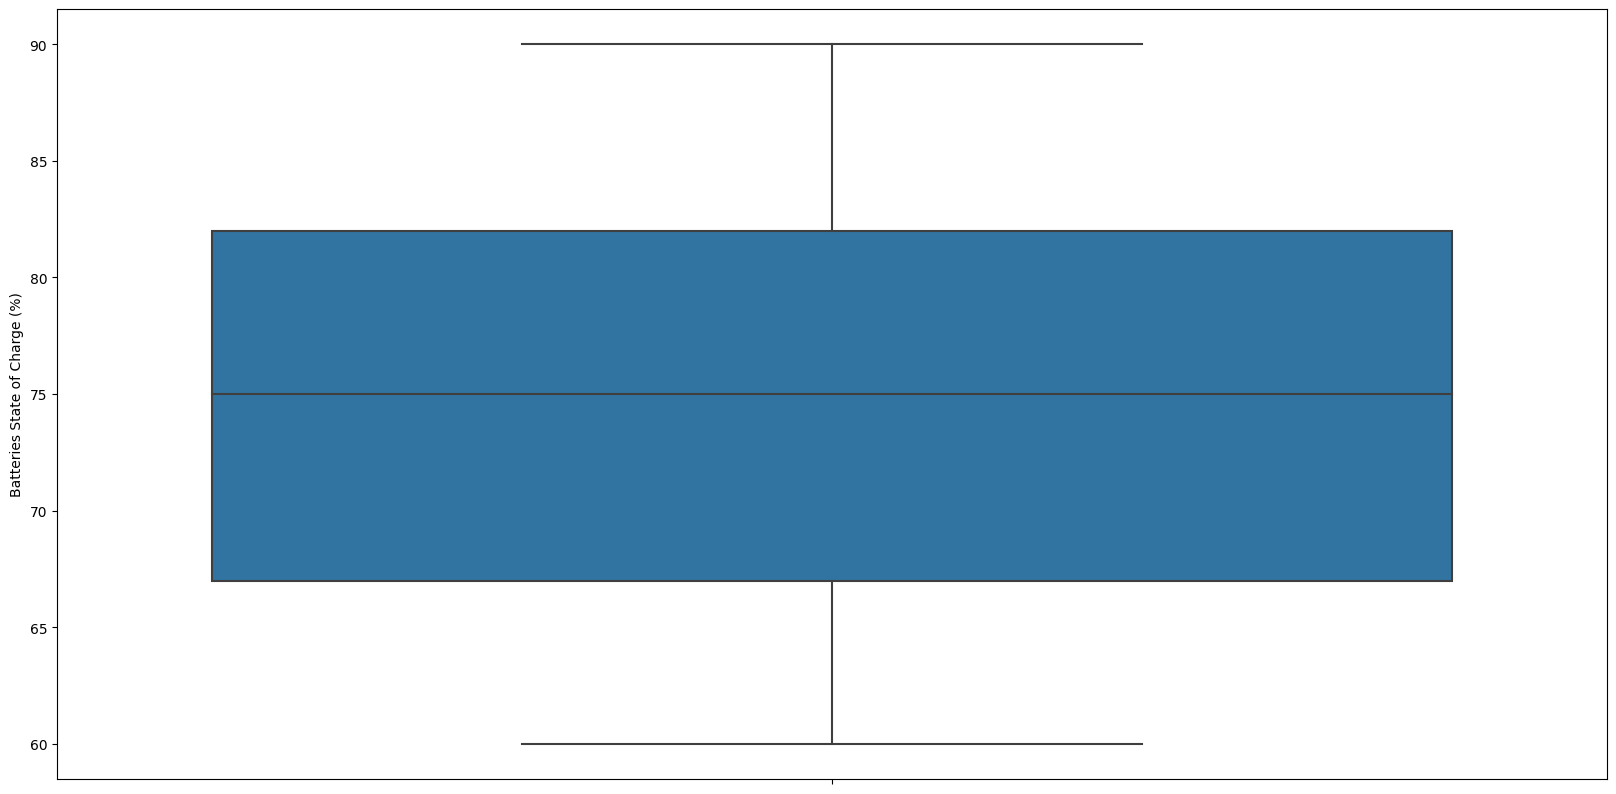

In [971]:
plt.figure(figsize=(20,10)) 
sns.boxplot(y="Batteries State of Charge (%)",data=df)

<AxesSubplot: >

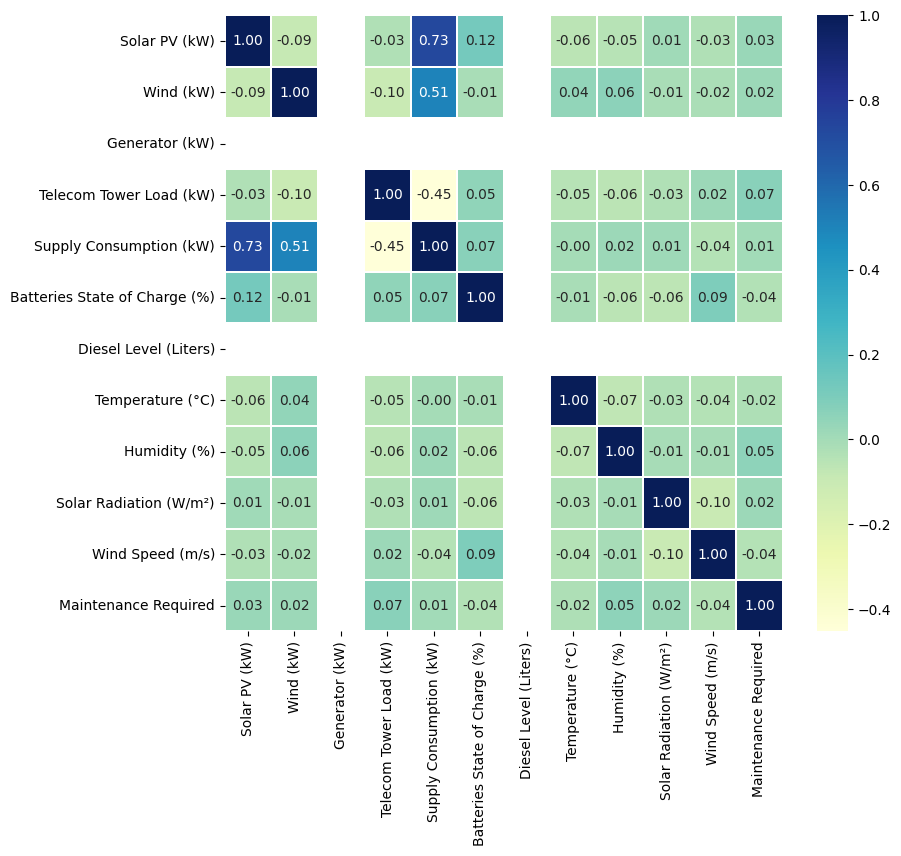

In [972]:
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

<AxesSubplot: xlabel='Batteries State of Charge (%)', ylabel='count'>

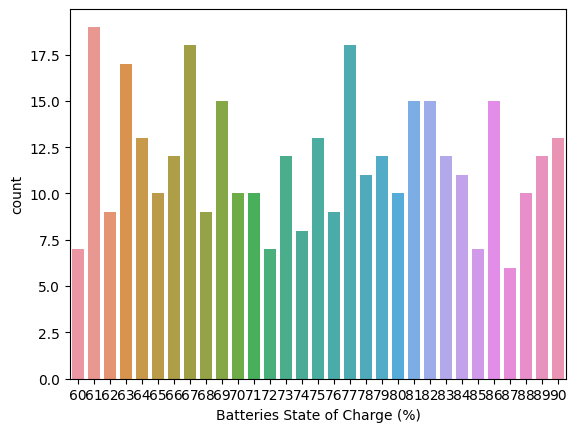

In [973]:
sns.countplot(x='Batteries State of Charge (%)',data=df)

<AxesSubplot: xlabel='Solar Radiation (W/m²)', ylabel='count'>

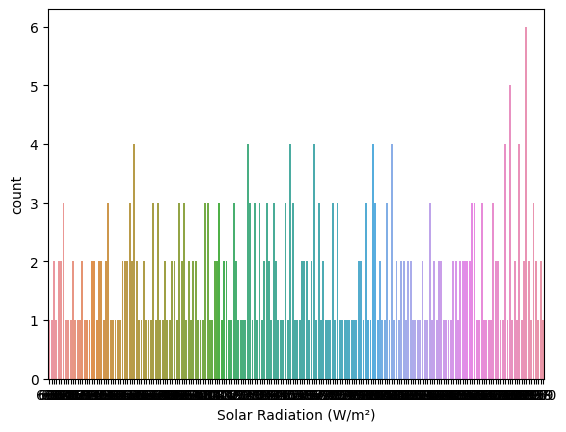

In [974]:
sns.countplot(x="Solar Radiation (W/m²)",data=df)

<AxesSubplot: xlabel='Wind Speed (m/s)', ylabel='count'>

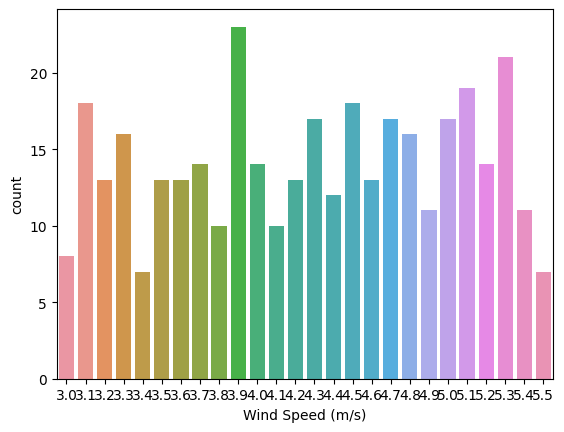

In [975]:
sns.countplot(x='Wind Speed (m/s)',data=df)

In [976]:
df.head()

,Solar PV (kW),Wind (kW),Generator (kW),Telecom Tower Load (kW),Supply Consumption (kW),Batteries State of Charge (%),Diesel Level (Liters),Temperature (°C),Humidity (%),Solar Radiation (W/m²),Wind Speed (m/s),Maintenance Required
0,9.78,5.50,0,8.93,6.35,83,100,20.0,78,770,4.7,0
1,12.34,4.86,0,7.46,9.74,80,100,21.7,60,767,4.7,0
2,10.19,4.07,0,9.38,4.88,71,100,20.7,74,858,3.7,1
3,9.60,6.67,0,8.60,7.67,86,100,24.0,67,604,4.3,0
4,13.03,6.58,0,7.69,11.92,83,100,24.9,63,693,5.3,1


([<matplotlib.patches.Wedge at 0x1a01e074a30>,
 [Text(0.7183153481492351, 0.8330804646690758, 'Solar PV (kW)'),
  Text(-1.0984142022814216, -0.059044391998463265, 'Batteries State of Charge (%)'),
  Text(0.07378552004091742, -1.0975225268905835, 'Solar Radiation (W/m²)'),
  Text(0.52422569920331, -0.9670508860937986, 'Wind Speed (m/s)'),
  Text(1.0231885134328977, -0.4038381680561866, 'Diesel Level (Liters)')])

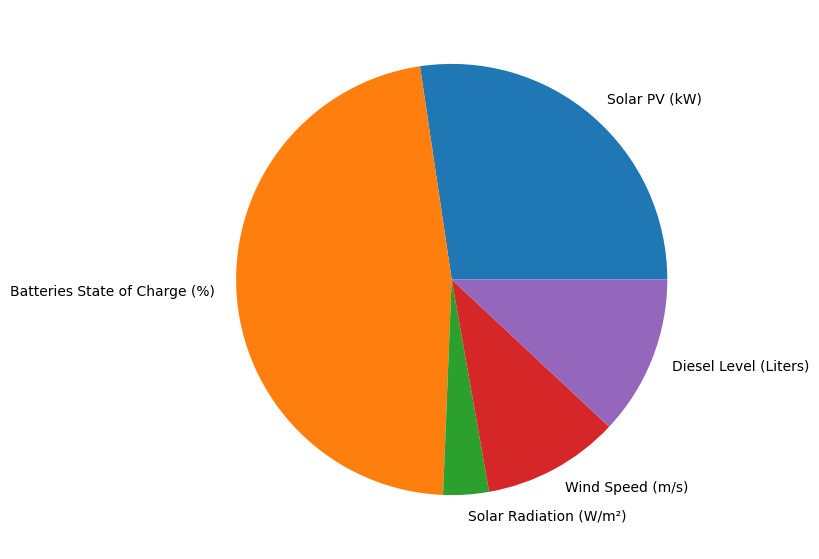

In [977]:
fig = plt.figure(figsize =(10, 7))
values = [32, 55, 4, 12, 14]
energy=('Solar PV (kW)','Batteries State of Charge (%)','Solar Radiation (W/m²)','Wind Speed (m/s)','Diesel Level (Liters)')
plt.pie(values,labels=energy)

### Feature Engineering

In [978]:
X['Energy from']=X['Wind Speed (m/s)']-X['Batteries State of Charge (%)']

In [979]:
X.head()

,Solar PV (kW),Wind (kW),Generator (kW),Telecom Tower Load (kW),Supply Consumption (kW),Batteries State of Charge (%),Diesel Level (Liters),Temperature (°C),Humidity (%),Solar Radiation (W/m²),Wind Speed (m/s),Maintenance Required,Energy from
0,9.78,5.50,0,8.93,6.35,83,100,20.0,78,770,4.7,0,-78.3
1,12.34,4.86,0,7.46,9.74,80,100,21.7,60,767,4.7,0,-75.3
2,10.19,4.07,0,9.38,4.88,71,100,20.7,74,858,3.7,1,-67.3
3,9.60,6.67,0,8.60,7.67,86,100,24.0,67,604,4.3,0,-81.7
4,13.03,6.58,0,7.69,11.92,83,100,24.9,63,693,5.3,1,-77.7


<AxesSubplot: >

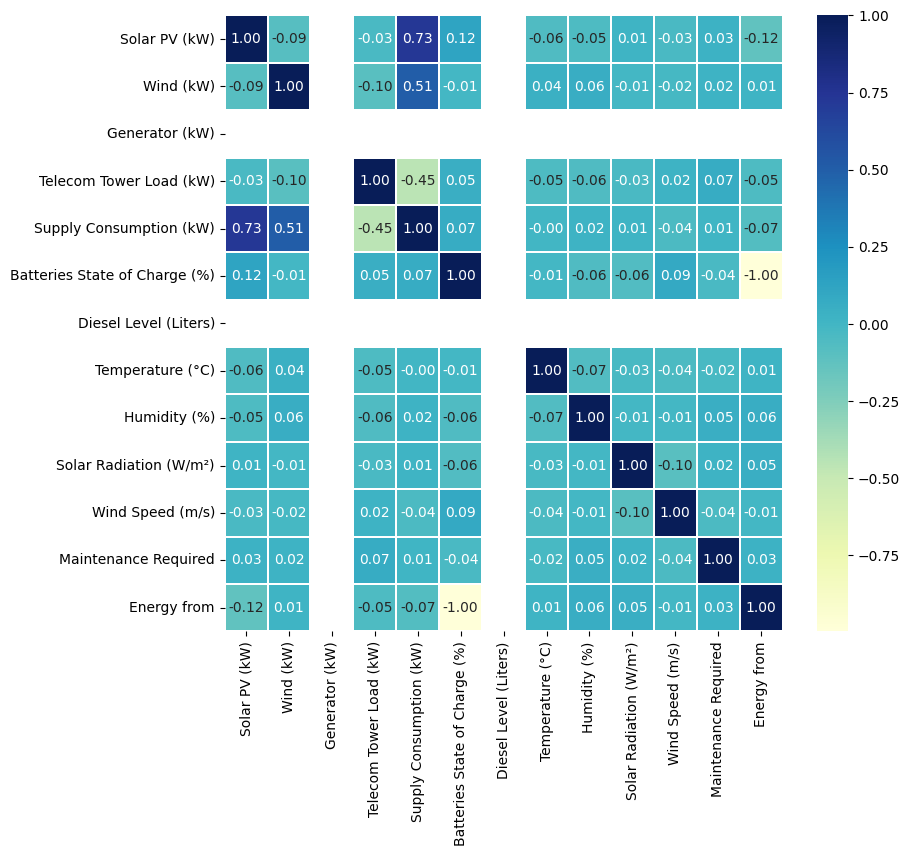

In [980]:
corrmat=X.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,fmt = ".2f",annot=True) 

In [981]:
X.shape

(365, 13)

### Feature Transformation

In [982]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

#Fitting and transforming data
X=scale.fit_transform(X)

In [983]:
train=X[:576]

In [984]:
train.shape

(365, 13)

In [985]:
test=X[576:]

In [986]:
Y=Y[:576]

In [987]:
Y.shape

(365,)

In [988]:
xtrain,xtest,ytrain,ytest=train_test_split(train,Y,test_size=0.2,random_state=0)

### Model Building


### Support vector Machines

In [989]:

### SVC classifier
SVMC = SVC(probability=True)
#Fitting the model
SVMC.fit(train,Y)

SVC(probability=True)

In [990]:
pred=logreg.predict(xtest)

In [991]:
accuracy_score(pred,ytest)

1.0

In [992]:
roc_auc_score(pred,ytest)

1.0